## Crypto Currency Forecasting Using LSTM model

### Background
Simply, crypto currency can be defined as a decentralized digital money
that is based on blockchain technology. Cryptocurrencies are created (and
secured) through cryptographic algorithms. Bitcoin, Ethereum, Litecoin, Monero, Solano, Cardano, etc. are a few most
popular cryptocurrencies, while bitcoin has been valued the most
expensive one.Bitcoin, and other cryptocurrencies created afterward rapidly gained the
popularity and reputation of being pure speculative assets. 

 ### Motivation
 As any good investor it is important to know regarding the high prices, low prices, hold and correct sell of the cryptocurrency to increase the profitability.The objective of this project is to predict the price of crypto currency using the prices of 3-4 cryptocurrencies using deep learning models. For this project I have used Bitcoin, Ethereum, Litecoin, Dogecoin to predict the preice of Bitcoin.

## Importing the libraries

As for this project I will be using deep learning, I have installed the required libraries from keras, pandas_datareader to collect the data, sklearn for normalizing the data, matplolib to make graphs.

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler  #scale the financial data between 0 to 1
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout  #LSTM model important for sequential data 
import matplotlib.pyplot as plt
import datetime as dt
from keras.layers import Dropout
from keras.layers import Dense
from datetime import date
import seaborn as sb

## Data Collection

Using Pandas_datareader, we can collect the data required from various APIs. Similarly, I have used yahoo! finance as my API to collect the data of different cryptocurrencies from we.DataReader, where my start date is the beginning of year 2012 to the most current time. To collect the most current time, either we can manually enter it or use other inbuilt libraries to get the current date. For this project I have used datetime .

Since the cryptocurrencies have been created at different time periods, they do not have the same starting date. Although bitcoin had been created in early 2000's I have kept the start date as 2018, to get the uniform data throughput the datasets.

In [2]:
end_date= dt.datetime.now()
df_btc=web.DataReader('BTC-USD',data_source='yahoo',start='2018-01-01', end=end_date)
df_eth=web.DataReader('ETH-USD',data_source='yahoo',start='2018-01-01',end=end_date) #established in 20
df_ltc=web.DataReader('LTC-USD',data_source='yahoo',start='2018-01-01', end=end_date)
df_doge=web.DataReader('DOGE-USD',data_source='yahoo',start='2018-01-01', end=end_date)

## Data Representation

From above data collected, we are trying to look at shape of each dataframe to see if they have different datalength.

In [3]:
df_btc.shape

(1585, 6)

In [4]:
df_eth.shape

(1585, 6)

In [5]:
df_ltc.shape

(1585, 6)

In [6]:
df_doge.shape  #the length of all the datasets are same

(1585, 6)

After verifying the datasets have same shape, we move forward to creating a separate dataframe with closing prices of the cyptocurrency only.

In [7]:
close_btc= df_btc['Close'].values
close_btc= close_btc.tolist()

close_eth=df_eth['Close'].values
close_eth=close_eth.tolist()

close_ltc=df_ltc['Close'].values
close_ltc=close_ltc.tolist()

close_doge= df_doge['Close'].values
close_doge= close_doge.tolist()

In [8]:
# Creating a dictionary of all the close lists then making a dataframe'
inde=[]
for i in range(1,(len(df_btc)+1)):
    inde.append(i)

In [9]:
data={'BTC':close_btc, 'ETH':close_eth, 'LTC':close_ltc, 'DOGE':close_doge}

In [10]:
df= pd.DataFrame(data, index=inde)  #dataframe of the closing prices only
df

,BTC,ETH,LTC,DOGE
1,13657.200195,772.640991,229.033005,0.008909
2,14982.099609,884.443970,255.684006,0.009145
3,15201.000000,962.719971,245.367996,0.009320
4,15599.200195,980.921997,241.369995,0.009644
5,17429.500000,997.719971,249.270996,0.012167
...,...,...,...,...
1581,37714.875000,2730.186768,96.165985,0.127557
1582,38469.093750,2827.756104,99.435776,0.132773
1583,38529.328125,2857.410400,100.693230,0.130938
1584,37750.453125,2783.476318,99.343018,0.129520


In [11]:
df.describe()

,BTC,ETH,LTC,DOGE
count,1585.000000,1585.000000,1585.000000,1585.000000
mean,20164.396991,1096.516204,105.387952,0.060403
std,18141.989485,1274.689872,63.544517,0.106196
min,3236.761719,84.308296,23.464331,0.001537
25%,7292.995117,195.515305,53.744362,0.002533
50%,9865.119141,388.650757,84.921936,0.003308
75%,37332.855469,1898.825195,146.300003,0.064458
max,67566.828125,4812.087402,386.450775,0.684777


Here is the graph plotted with all four crypto currencies closing price used for predictions.

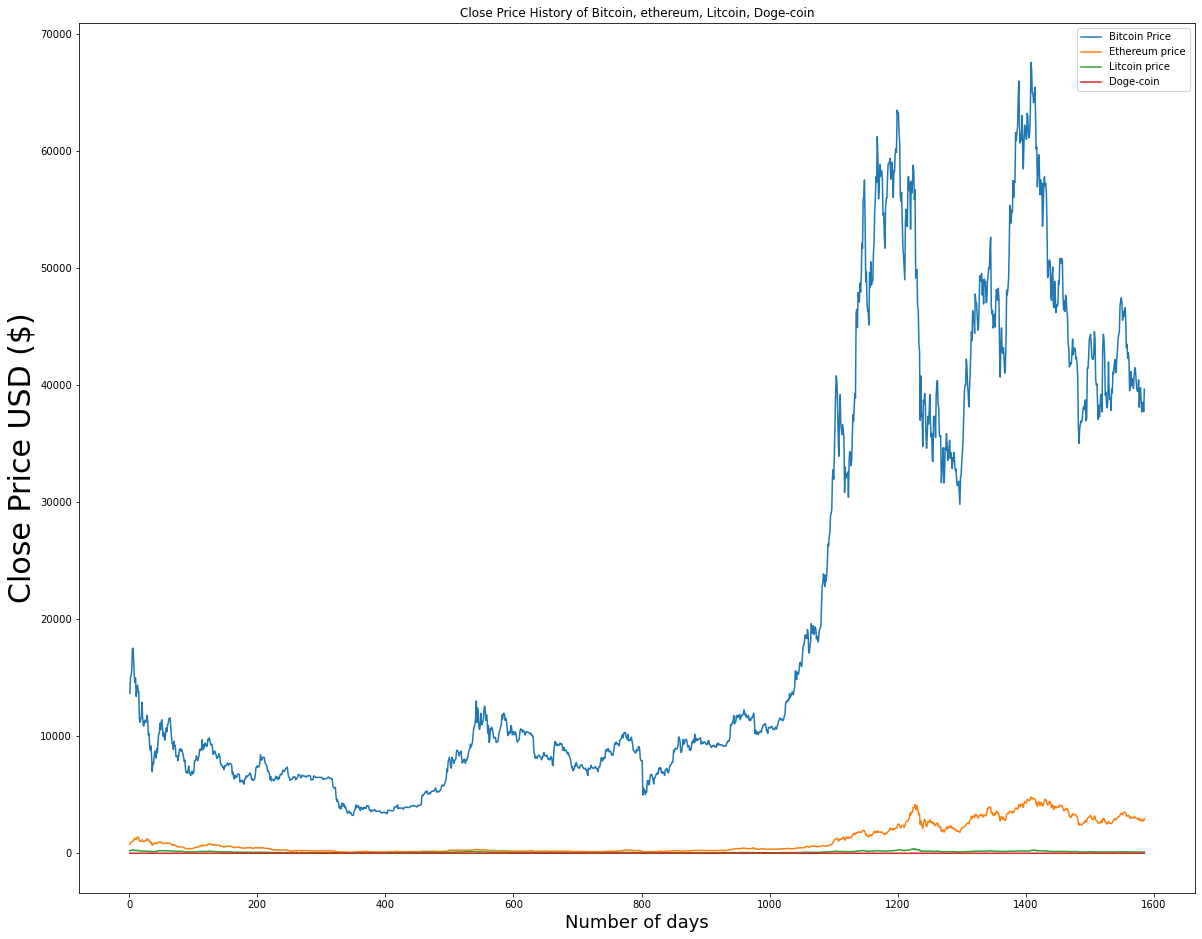

In [13]:
plt.figure(figsize=(20,16))
plt.title('Close Price History of Bitcoin, ethereum, Litcoin, Doge-coin')
plt.plot(df)
plt.xlabel('Number of days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=30)
plt.legend(['Bitcoin Price','Ethereum price','Litcoin price','Doge-coin'])
plt.show()

### Separate plots 

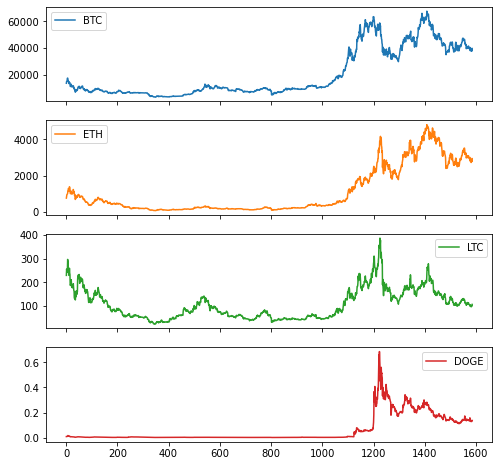

In [14]:
df.plot(subplots=True, figsize=(8, 8))
plt.legend(loc='best')


## Correlation Analysis

In [15]:
df.corr()  #hence there is some correlartion between them

,BTC,ETH,LTC,DOGE
BTC,1.000000,0.926686,0.750754,0.794322
ETH,0.926686,1.000000,0.717178,0.857724
LTC,0.750754,0.717178,1.000000,0.677487
DOGE,0.794322,0.857724,0.677487,1.000000


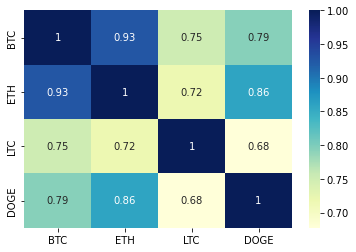

In [16]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Testing data and training data

To separate the training and testing dataset. Here I have separated the training datasets and testing datasets, convereted them to numpy arrays and reshaped required for the model. 3D

In [160]:
test_ratio= 0.2  #20% testing data
df_np= df.values
split_point= int(len(df_np)* (1-test_ratio))
train_set= df_np[: split_point]
test_set= df_np[split_point:]

In [161]:
train_set.shape

(1255, 4)

In [162]:
test_set.shape

(314, 4)

In [163]:
def split_data(data,num_data,time):
    x,y= [], []  #creating two separate lists to appaned the train or test sets of x and y
    for i in range(len(data)-num_data-time+1):
        x.append(data[i:(i+num_data)])
        y.append(data[i+time+n-1])
    return np.array(x), np.array(y)  #this will return me array of train or test set provided
num_data=4
time=1
x_train, y_train= split_data(train_set,num_data,time)
x_test, y_test= split_data(test_set,num_data,time)

In [164]:
x_train

array([[[1.36572002e+04, 7.72640991e+02, 2.29033005e+02, 8.90900008e-03],
        [1.49820996e+04, 8.84443970e+02, 2.55684006e+02, 9.14500002e-03],
        [1.52010000e+04, 9.62719971e+02, 2.45367996e+02, 9.32000019e-03],
        [1.55992002e+04, 9.80921997e+02, 2.41369995e+02, 9.64399986e-03]],

       [[1.49820996e+04, 8.84443970e+02, 2.55684006e+02, 9.14500002e-03],
        [1.52010000e+04, 9.62719971e+02, 2.45367996e+02, 9.32000019e-03],
        [1.55992002e+04, 9.80921997e+02, 2.41369995e+02, 9.64399986e-03],
        [1.74295000e+04, 9.97719971e+02, 2.49270996e+02, 1.21670002e-02]],

       [[1.52010000e+04, 9.62719971e+02, 2.45367996e+02, 9.32000019e-03],
        [1.55992002e+04, 9.80921997e+02, 2.41369995e+02, 9.64399986e-03],
        [1.74295000e+04, 9.97719971e+02, 2.49270996e+02, 1.21670002e-02],
        [1.75270000e+04, 1.04168005e+03, 2.96454010e+02, 1.48630003e-02]],

       ...,

       [[3.75751797e+04, 2.70612500e+03, 1.87263977e+02, 4.23373997e-01],
        [3.92087656

In [165]:
y_train

array([[1.74295000e+04, 9.97719971e+02, 2.49270996e+02, 1.21670002e-02],
       [1.75270000e+04, 1.04168005e+03, 2.96454010e+02, 1.48630003e-02],
       [1.64775996e+04, 1.15317004e+03, 2.88450989e+02, 1.70879997e-02],
       ...,
       [3.58623789e+04, 2.71509277e+03, 1.76639435e+02, 3.71807009e-01],
       [3.35607070e+04, 2.59026318e+03, 1.61732803e+02, 3.31050009e-01],
       [3.34726328e+04, 2.51743872e+03, 1.61161072e+02, 3.27686995e-01]])

In [166]:
x_test

array([[[3.73451211e+04, 2.60826709e+03, 1.72138657e+02, 3.43331009e-01],
        [3.67025977e+04, 2.47151855e+03, 1.68203064e+02, 3.26350987e-01],
        [3.73343984e+04, 2.35376880e+03, 1.62880524e+02, 3.19359004e-01],
        [3.55525156e+04, 2.37248438e+03, 1.62014862e+02, 3.12083989e-01]],

       [[3.67025977e+04, 2.47151855e+03, 1.68203064e+02, 3.26350987e-01],
        [3.73343984e+04, 2.35376880e+03, 1.62880524e+02, 3.19359004e-01],
        [3.55525156e+04, 2.37248438e+03, 1.62014862e+02, 3.12083989e-01],
        [3.90978594e+04, 2.50839160e+03, 1.70930878e+02, 3.24382007e-01]],

       [[3.73343984e+04, 2.35376880e+03, 1.62880524e+02, 3.19359004e-01],
        [3.55525156e+04, 2.37248438e+03, 1.62014862e+02, 3.12083989e-01],
        [3.90978594e+04, 2.50839160e+03, 1.70930878e+02, 3.24382007e-01],
        [4.02184766e+04, 2.53789111e+03, 1.72949097e+02, 3.32085013e-01]],

       ...,

       [[4.01271836e+04, 3.03037646e+03, 1.04828415e+02, 1.38076007e-01],
        [4.11667305

In [167]:
y_test

array([[3.90978594e+04, 2.50839160e+03, 1.70930878e+02, 3.24382007e-01],
       [4.02184766e+04, 2.53789111e+03, 1.72949097e+02, 3.32085013e-01],
       [4.04062695e+04, 2.61093677e+03, 1.78659424e+02, 3.28381002e-01],
       ...,
       [4.04244844e+04, 3.06231030e+03, 1.14430710e+02, 1.43711999e-01],
       [3.97169531e+04, 2.99340332e+03, 1.09042786e+02, 1.39458999e-01],
       [3.98608828e+04, 2.99792554e+03, 1.09745819e+02, 1.40191957e-01]])

## Predict the coin

Here we can predict one of the coins you would like to predict out of the 4 we have used. Hence, I have defined a function where you will input the index of the cryptocurrency i.e. column number, to be predicted using 4 closing prices. 

In [219]:
def  predict_crypto(i, y_test= y_test, y_train = y_train):
    x = np.reshape(y_test[:, i], (y_test [:, i].shape[0], 1))
    y = np.reshape(y_train[:, i], (y_train[:, i].shape[0], 1))
    return x, y

In [222]:
testY_btc, trainY_btc =  predict_crypto(0)  #the index of my prediction is 0

## Normalize the data

To normalize the data, I used MinMaxScaler() to make data range between [0,1]

In [223]:
scaler = MinMaxScaler()

In [224]:
def scale(data):  #toget the scaled data back
    scaled_data = scaler.transform(data)
    return scaled_data

In [225]:
scalers = {}
for i in range (x_train.shape[2]):
  scalers[i] = MinMaxScaler()
  x_train[:, :, i] = scalers[i].fit_transform(x_train[:, :, i])
for i in range(x_test.shape[2]):
  x_test[:, :, i] = scalers[i].transform(x_test[:, :, i])

trainY_btc = scaler.fit_transform(trainY_btc)
testY_btc = scale(testY_btc)

## LSTM

In [226]:
def train_model(y):
    model= Sequential()
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(x_train, y, epochs =60, verbose =1)
    return history, model

In [227]:
history, model = train_model(trainY_btc)
predictions_btc = model.predict(x_test)

Epoch 1/60
40/40 [==============================] - 11s 18ms/step - loss: 0.0353
Epoch 2/60
40/40 [==============================] - 1s 17ms/step - loss: 0.0041
Epoch 3/60
40/40 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 4/60
40/40 [==============================] - 1s 17ms/step - loss: 0.0019
Epoch 5/60
40/40 [==============================] - 1s 16ms/step - loss: 0.0016
Epoch 6/60
40/40 [==============================] - 1s 17ms/step - loss: 0.0016
Epoch 7/60
40/40 [==============================] - 1s 19ms/step - loss: 0.0012
Epoch 8/60
40/40 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 9/60
40/40 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 10/60
40/40 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 11/60
40/40 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 12/60
40/40 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 13/60
40/40 [=================

In [238]:
predictions_btc

array([[0.55496323],
       [0.5580472 ],
       [0.57070506],
       [0.5816591 ],
       [0.60833234],
       [0.6081505 ],
       [0.5929999 ],
       [0.5726004 ],
       [0.55758744],
       [0.5350929 ],
       [0.52009785],
       [0.50602746],
       [0.5004442 ],
       [0.5116631 ],
       [0.5109433 ],
       [0.5062057 ],
       [0.49983665],
       [0.5189715 ],
       [0.5366851 ],
       [0.534737  ],
       [0.5326577 ],
       [0.5197518 ],
       [0.51797014],
       [0.523428  ],
       [0.52559066],
       [0.52121294],
       [0.5108832 ],
       [0.5083317 ],
       [0.5051619 ],
       [0.5072782 ],
       [0.5127969 ],
       [0.5105659 ],
       [0.50835305],
       [0.49822488],
       [0.4920684 ],
       [0.4855997 ],
       [0.47899818],
       [0.47713286],
       [0.47317824],
       [0.47076437],
       [0.46923932],
       [0.4779006 ],
       [0.49793923],
       [0.50990844],
       [0.52897906],
       [0.55074894],
       [0.57931834],
       [0.607

## Plotting

Since now , we again have to plot the graph in the original price, we initially have to descale the data to transform it into form of actual predicted price.

In [228]:
def plot_graph(predictions,y):
    predictions = scaler.inverse_transform(predictions)
    y = scaler.inverse_transform(y)
    mae = mean_absolute_error(y, predictions)
    print("Test MAE: %.6f" % mae)
    plt.figure(figsize=(15,6))
    plt.plot(predictions,color='red', label="Test set predictions" )
    plt.plot(y,color='green', label="Actual closing data")
    plt.legend()
    plt.ylabel('Price')
    plt.xlabel('Days' )
    plt.title ("Bitcoin close Price prediction")
    plt.show()

Test MAE: 2064.500914


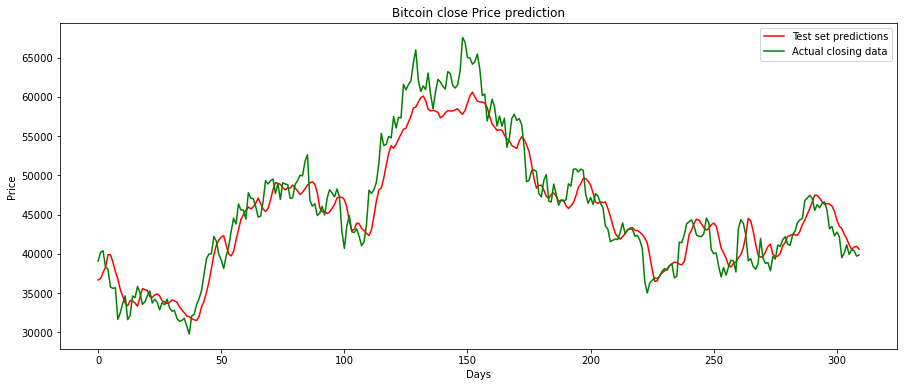

In [229]:
plot_graph(predictions_btc, testY_btc)